<div class="cite2c-biblio"></div>** Abstract** 

Tumor hypoxia is associated clinically with therapeutic resistance and poor patient outcomes. One feature of tumor hypoxia is activated expression of carbonic anhydrase IX (CA9), a regulator of pH and tumor growth. Disruption of the downstream bicarbonate products can acidify tumor cells and suppress tumor growth [[McIntyre]](http://cancerres.aacrjournals.org/content/76/13/3744.short). Hypoxia also promotes tumour heterogeneity through the epigenetic regulation of CA9 [[Ledaki]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4637295/). CA9 is also a _transmembrane protein_ and is stained for for use as an endogenous marker for investigating hypoxia [[Newbold]](http://www.sciencedirect.com/science/article/pii/S0360301608031799). 

CA9 is part of a family of carbonic anhydrases (zinc metalloenzymes) that catalyze reversible hydration of carbion dioxide to form carbonic acid. _Girentuximab_ (trade name _Rencarex_) is a chimeric IgG1 monoclonal antibody to carbonic anhydrase IX which was granted fast track status and orphan drug designation by the FDA for renal cancer [[Springer]](http://adisinsight.springer.com/drugs/800006571). In January 2017, Telix Pharmaceuticals Limited, an Australian biotechnology company, announced that it had in-licensed Girentuximab for use as a radioimmunoconjugate, iodine (124I) girentuximab, called _Redectane_ [[Arnold]](https://www.biospace.com/article/releases/wilex-ag-release-company-signs-antibody-license-agreement-with-telix-pharma-/).

RNA-seq gene expression data from The Cancer Genome Atlas (TCGA) and the Genotype Tissue Expression Consortium (GTEx) should corroborate literature claims regarding CA9 expression in Renal Cell Carcinomas (RCCs). Once validated, the expression motif of RCCS can be compared to other cancer subtypes to suggest candidates for possible repositioning of CA9-targeted drugs.

**Section**

1. [CA9 Expression in Kidney](#CA9-Expression-in-Kidney)
2. [CA9 Expression Across Tissues](#CA9-Expression-Across-Tissues)
3. [HIF Pathway Clustering](#HIF-Pathway-Clustering)
4. [Complications](#Complications)


### Imports and Inputs

In [1]:
# Set autoreload module for dev
%load_ext autoreload
%autoreload 2
%aimport rnaseq_lib


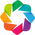

In [2]:
from __future__ import division
import rnaseq_lib as r

import numpy as np
import pandas as pd
import holoviews as hv
hv.extension('bokeh')

In [3]:
%%time
## Synapse ID: syn11515015
df_path = '/mnt/rnaseq-cancer/Objects/tcga-gtex-metadata-expression.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0, dtype=r.tissues.dtype)

CPU times: user 3min 22s, sys: 4.28 s, total: 3min 26s
Wall time: 3min 26s


In [4]:
h = r.plot.Holoview(df)

# CA9 Expression in Kidney

Validate literature claims of high levels of expression in RCCs compared to normal kidney tissue.

1\. How does gene expression for renal cell carcinoma in TCGA compare to normal kidney samples in TCGA and GTEx?

In [30]:
h.gene_kde(gene='SLC2A1', tissue_subset=['Stomach'])

:Overlay
   .Distribution.Tumor_hyphen_minus_Stomach  :Distribution   [Gene Expression]   (Density)
   .Distribution.GTEx_hyphen_minus_Stomach   :Distribution   [Gene Expression]   (Density)
   .Distribution.Normal_hyphen_minus_Stomach :Distribution   [Gene Expression]   (Density)

In [15]:
h.gene_kde(gene='CA9', tissue_subset=['Kidney'])

:Overlay
   .Distribution.Tumor_hyphen_minus_Kidney  :Distribution   [Gene Expression]   (Density)
   .Distribution.GTEx_hyphen_minus_Kidney   :Distribution   [Gene Expression]   (Density)
   .Distribution.Normal_hyphen_minus_Kidney :Distribution   [Gene Expression]   (Density)

2a. What percentage of RCCs overexpress CA9? (Differential Expression)

A Log2 Fold Change (L2FC) of 2 or higher is typically considered significantly differentially expressed.

In [7]:
%%opts Curve (color='red')
h.l2fc_by_perc_samples(gene='CA9', tissue_subset=['Kidney'])

:Overlay
   .Area.Kidney :Area   [Log2 Fold Change]   (Tumor Samples With Greater L2FC)
   .Spikes.I    :Spikes   [x]

2b. What percentage of RCCs overexpress CA9? (Outlier Analysis)

Calculate IQR and bounds using gene expression distribution of CA9 across all normal samples

In [8]:
h.gene_kde(gene='CA9', tumor=False).relabel('CA9 Expression Across Normals') + \
hv.Distribution(df[df.tumor == 'no']['CA9'].apply(h.l2norm), 
                kdims=[hv.Dimension('Expression', unit='log2(x+1)')], 
                label='Combined CA9 Expression')

:Layout
   .Overlay.CA9_Expression_Across_Normals :Overlay
      .Distribution.GTEx_hyphen_minus_Pancreas    :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Pancreas  :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Kidney      :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Kidney    :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Stomach     :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Stomach   :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Esophagus   :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Esophagus :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Colon       :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Colon     :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Liver       :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Liver     :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Bladder     :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Bladder   :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Lung        :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Lung      :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Uterus      :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Uterus    :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Breast      :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Breast    :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Adrenal     :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Adrenal   :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Brain       :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Brain     :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Testis      :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Testis    :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Skin        :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Skin      :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Thyroid     :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Thyroid   :Distribution   [Gene Expression]   (Density)
      .Distribution.GTEx_hyphen_minus_Prostate    :Distribution   [Gene Expression]   (Density)
      .Distribution.Normal_hyphen_minus_Prostate  :Distribution   [Gene Expression]   (Density)
   .Distribution.Combined_CA9_Expression  :Distribution   [Expression]   (Density)

In [9]:
upper, lower = h.iqr_bounds(df[df.tumor == 'no']['CA9'].apply(h.l2norm))
print 'Upper Bound for CA9: {}'.format(round(upper, 2))

Upper Bound for CA9: 10.8


Calculate bounds using only kidney normal samples

In [10]:
kidney_normals = df[(df.tumor == 'no') & (df.tissue == 'Kidney')]['CA9'].apply(h.l2norm)
k_upper, k_lower = h.iqr_bounds(kidney_normals)
print 'Upper Bound for CA9 (Kidney): {}'.format(round(k_upper, 2))

Upper Bound for CA9 (Kidney): 5.29


In [11]:
%%opts Spikes (line_width=5 line_alpha=0.5 line_color=hv.Cycle('Set2'))
%%opts Overlay [legend_position='left' width=500]
h.gene_kde(gene='CA9', tissue_subset=['Kidney'], normal=False, gtex=False) * \
hv.Spikes([upper], label='Upper Bound') * \
hv.Spikes([k_upper], label='Upper Bound (Kidney)')

:Overlay
   .Distribution.Tumor_hyphen_minus_Kidney                       :Distribution   [Gene Expression]   (Density)
   .Spikes.Upper_Bound                                           :Spikes   [x]
   .Spikes.Upper_Bound_left_parenthesis_Kidney_right_parenthesis :Spikes   [x]

In [12]:
tumor_ca9 = df[(df.tissue == 'Kidney') & (df.tumor == 'yes')]['CA9'].apply(h.l2norm)
perc = len([x for x in tumor_ca9 if x > upper]) / len(tumor_ca9)
k_perc = len([x for x in tumor_ca9 if x > k_upper]) / len(tumor_ca9)
print 'Percentage of tumor samples greater than upper bound: {}%'.format(round(perc, 2) * 100)
print 'Percentage of tumor samples greater than Kidney upper bound: {}%'.format(round(k_perc, 2) * 100)

Percentage of tumor samples greater than upper bound: 93.0%
Percentage of tumor samples greater than Kidney upper bound: 96.0%


### Summary
TCGA and GTEx gene expression data validate literature claims regarding CA9 expression in RCCs.

# CA9 Expression Across Tissues
Examine whether similar expression motifs exist in other tissues and cancer subtypes.

1. What is the distribution of CA9 across all tissues, within the context of their respective sample sizes?

##### 3\. How do expression and L2FC relate across tissues for CA9?

In [28]:
path = [(4, 4), (9.5, 4), (9.5, 8), (4, 8), (4, 4)]
de = h.gene_de('CA9', extents=(1.3, -4.3, 14, 12)) * hv.Path([path])
de

:Overlay
   .Scatter.I :Scatter   [Expression]   (L2FC,Tissue)
   .Path.I    :Path   [x,y]

Kidney is an extreme outlier, but several tissues possess both high levels of expression as well as signifcant L2FC for CA9 (blue boxed area).
- **Bladder**
    - Very few normal samples
    - "CA9 are differentially regulated in superficial vs invasive bladder cancer" [[Turner]](https://www.nature.com/articles/6600215)
    - "Carbonic Anhydrase  [...] as Urinary Biomarkers for Bladder Cancer Detection" [[Urquidi]](http://www.sciencedirect.com/science/article/pii/S0090429512000428)
- **Pancreas**
    - _Very few TCGA normals_
    - "Hypoxia activates the hedgehog signaling pathway in a ligand-independent manner by upregulation of Smo transcription in pancreatic cancer" [[Onishi]](http://onlinelibrary.wiley.com/doi/10.1111/j.1349-7006.2011.01912.x/full)
- **Uterus**
    - Few TCGA normals
    - "Tumor carbonic anhydrase 9 expression is associated with the presence of lymph node metastases in uterine cervical cancer" [[Lee]](http://onlinelibrary.wiley.com/doi/10.1111/j.1349-7006.2007.00396.x/full)
- **Colon**
    - "Stromal expression of hypoxia regulated proteins is an adverse prognostic factor in colorectal carcinomas." [[Cleven]](https://www.ncbi.nlm.nih.gov/pubmed/17452775?dopt=Abstract&holding=npg)
- **Lung**
    - "Expression of Hypoxia-inducible Carbonic Anhydrase-9 Relates to Angiogenic Pathways and Independently to Poor Outcome in Non-Small Cell Lung Cancer" [[Giatromanolaki]](http://cancerres.aacrjournals.org/content/61/21/7992.short)
- **Esophagus**
    - _Very few TCGA normals_
    - "We also observed higher frequency gains at 9p (13% versus 4%; p = 0.04) containing putative cancer loci such as CA9" - Comparative Genomics of Esophageal Adenocarcinoma and Squamous Cell Carcinoma. [[Bandla]](http://www.sciencedirect.com/science/article/pii/S0003497512001762)

**Pancreas** and **esophagus** are both interesting due to the lack of corresponding TCGA normals that exist for these cancers.

# HIF Pathway Genes

The HIF (Hypoxia) pathway is implicated in RCCs and CA9 expression. Examine similarity between tissues for the gene set.

Genes from [HIF-1-alpha transcription factor network](https://www.ncbi.nlm.nih.gov/gene)

In [87]:
hif_genes = ['ABCB1', 'ABCG2', 'ADM', 'AKT1', 'ALDOA', 'ARNT', 'BHLHE40', 'BHLHE41', 
             'BNIP3', 'CA9', 'CITED2', 'COPS5', 'CP', 'CREB1', 'CREBBP', 'CXCL12', 'CXCR4', 
             'EDN1', 'EGLN1', 'EGLN3', 'ENG', 'ENO1', 'EP300', 'EPO', 'ETS1', 'FECH', 'FOS', 
             'FURIN', 'GATA2', 'GCK', 'HDAC7', 'HIF1A', 'HK1', 'HK2', 'HMOX1', 'HNF4A', 'ID2', 
             'IGFBP1', 'ITGB2', 'JUN', 'LDHA', 'LEP', 'MCL1', 'NCOA1', 'NCOA2', 'NDRG1', 'NOS2',
             'NPM1', 'NT5E', 'PFKFB3', 'PFKL', 'PGK1', 'PGM1', 'PKM', 'PLIN2', 'SERPINE1',
             'SLC2A1', 'SMAD3', 'SMAD4', 'SP1', 'TERT', 'TF', 'TFF3', 'CD71', 'VEGFA']

hif_genes = [x for x in hif_genes if x in df.columns]
print 'Number of genes from HIF pathway: {}'.format(len(hif_genes))

Number of genes from HIF pathway: 64


In [88]:
%%opts HeatMap [width=875 xrotation=60 height=400 colorbar=True toolbar='above' tools=['hover']]
h.gene_de_heatmap(genes=hif_genes)

:HeatMap   [Gene,Tissue]   (L2FC)

No genes in the HIF pathway exhibit the same level of overexpression as CA9, but clustering may reveal which samples share the most commonality with RCCs HIF pathway. 

1. Cluster only kidney samples

In [89]:
%%time
hif_kidney = h.tsne(genes=hif_genes, title='HIF Genes in Kidney', tissue_subset=['Kidney'])

CPU times: user 23 s, sys: 1.22 s, total: 24.2 s
Wall time: 24.2 s


In [90]:
%%opts Scatter [color_index='labels' height=500 width=500 legend_position='left' tools=['hover']] 
%%opts Scatter (cmap='Set1' alpha=0.25 size=5)
hif_kidney

:Scatter   [x]   (y,id,tissue,dataset,tumor,type,labels)

2\. Cluster all samples

In [91]:
%%time
hif_tsne = h.tsne(genes=hif_genes, title='tSNE of HIF Genes Across Tissues')

CPU times: user 15min 2s, sys: 1min 6s, total: 16min 9s
Wall time: 9min 29s


In [92]:
%%opts Scatter [color_index='tissue' height=500 width=800 legend_position='left' tools=['hover']] 
%%opts Scatter (cmap='tab20' alpha=0.25 size=5)
hif_tsne

:Scatter   [x]   (y,id,tissue,dataset,tumor,type,labels)

# Complications
Despite similarities in expression motifs, there are several complications to consider before assuming other cancer types may be reasonable repositioning candidates.

1. No other cancer subtype shares the extreme level of expression and L2FC as RCC.
    1. Lower levels of overexpression may impact efficacy of monoclonal antibodies
2. Expression of CA9 may not translate to CA9 expression on the cell surface.
    1. While CA9 is a well-known transmembrane protein, the cellular environment of tumors is heterogeneous and may lack functionality that shuttles proteins to the membrane. 
    2. Alternatively, because CA9 is implicated in tumor hypoxia, expression of CA9 on the cell surface assists the tumor's survival. 
3. CA9 is not a common target for current cancer drugs.
    1. FDA fast track approval was recent, so the efficacy of MAbs that target CA9 is not well-documented. 
    2. FDA fast track approval and recent developments to use Girentuximab as a radioimmunoconjugate imply that the drug may indeed be effective.

# Pathway Transcription Factors 

In [5]:
tf_path = '/mnt/rnaseq-cancer/Metadata/TF_targets.tsv'
kinase_path = '/mnt/rnaseq-cancer/Metadata/kinase_targets.tsv'

tf_targets, target_tfs = r.tissues.parse_pathway(tf_path)
kinase_subs, sub_kinases = r.tissues.parse_pathway(kinase_path)

In [8]:
'KDR' in kinase_subs.keys()

True

In [13]:
'CA9' in target_tfs.keys()

True

In [14]:
target_tfs['CA9']

['SP1', 'AHR', 'PDX1', 'ARNT', 'ETS1', 'HIF1A', 'TP53', 'NR3C1']

In [15]:
def get_graph(source, targets, value
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              
              =None):
    df = pd.DataFrame()
    df['source'] =  source
    df['target'] = targets
    if value:
        df['value'] = value
    return df

In [16]:
gene = 'CA9'
target = target_tfs[gene]
source = [gene for _ in target]
value = [1, 2, 1, 2, 3, 2, 5, 4]
g = get_graph(source, target, value)
g = hv.Graph((g)).redim(source='source', target='target', value='value')

In [17]:
%%opts Graph [edge_color_index='value' colorbar=True colorbar_position='left']
g

:Graph   [source,target]   (value)

In [18]:
#source = np.array([0 for _ in xrange(len(target))])
#target = np.array([x for x in xrange(len(target))])
hv.Graph(((source, target),))#.redim.range(**padding)

:Graph   [start,end]

In [19]:
# Declare abstract edges
import numpy as np
N = 8
node_indices = np.arange(N, dtype=np.int32)
source = np.zeros(N, dtype=np.int32)
target = node_indices

#padding = dict(x=(-1.2, 1.2), y=(-1.2, 1.2))

simple_graph = hv.Graph(((source, target),))#.redim.range(**padding)

In [20]:
%%opts Graph [color_index='source']
simple_graph

:Graph   [start,end]

In [ ]:

























zxhnj






















